In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [26]:
path = "./movies.csv"
df = pd.read_csv(path, header=None)
print("Read {} rows.".format(len(df)))

Read 8232 rows.


In [27]:
df.columns = ["name","class","date","intro"]
df.head()

,name,class,date,intro
0,一世狂野,"['劇情', '犯罪', '歷史/傳記']",2020/10/30,喬治戎格一生都在追求所謂的美國夢，也就是享受美好富裕的生活，但是他卻不願像他父親那樣一輩子都...
1,玩命關頭,"['動作', '劇情', '犯罪', '懸疑/驚悚']",2001/10/13,唐米尼杜洛托是洛城街頭賽車界的老大哥，他身邊有一群忠心耿耿的手下，他白天忙著組裝高性能跑車，...
2,戰雲密佈,"['動作', '犯罪', '懸疑/驚悚', '戰爭']",2001/10/13,美國空軍最高機密的隱形戰機驚傳失蹤！祕密訓練的飛行軍官傑克，被誣陷勾結恐怖組織，參與竊取戰機...
3,騎士風雲錄,"['動作', '冒險', '喜劇']",2001/10/19,14世紀中古時期的社會階級分明，出身卑微的平民不論如何努力和奮鬥，都無法跨越階級制度而翻身致...
4,金法尤物,['喜劇'],2001/10/19,在【歡樂谷】、【危險性遊戲】挑大樑的瑞絲薇斯朋飾演【金法尤物】中飽受眾人歧視的金髮美女，因為...


In [29]:
x = 0
for i in df["class"]:
    df["class"][x] = i.replace("[","").replace("]","").replace("\'","").split(',')[0]
    x = x+1
df

,name,class,date,intro
0,一世狂野,劇情,2020/10/30,喬治戎格一生都在追求所謂的美國夢，也就是享受美好富裕的生活，但是他卻不願像他父親那樣一輩子都...
1,玩命關頭,動作,2001/10/13,唐米尼杜洛托是洛城街頭賽車界的老大哥，他身邊有一群忠心耿耿的手下，他白天忙著組裝高性能跑車，...
2,戰雲密佈,動作,2001/10/13,美國空軍最高機密的隱形戰機驚傳失蹤！祕密訓練的飛行軍官傑克，被誣陷勾結恐怖組織，參與竊取戰機...
3,騎士風雲錄,動作,2001/10/19,14世紀中古時期的社會階級分明，出身卑微的平民不論如何努力和奮鬥，都無法跨越階級制度而翻身致...
4,金法尤物,喜劇,2001/10/19,在【歡樂谷】、【危險性遊戲】挑大樑的瑞絲薇斯朋飾演【金法尤物】中飽受眾人歧視的金髮美女，因為...
...,...,...,...,...
8227,你是豬,劇情,2020/11/20,★創作鬼才黃明志這次不搞笑，根據一場校園暴動的真人真事改編，聚焦種族歧視議題★2000年沒有...
8228,2020高雄電影節,影展,2020/10/16,高雄電影節二十歲了！做為全台第三大，同時也是南台灣最大型的年度電影盛事，今年影展同樣規劃類型...
8229,怵目驚魂28天,科幻,2020/12/11,開啟燒腦話題，全球推崇獨立經典，傑克葛倫霍影史最具代表性作品。資質聰穎的唐尼想法異於同儕，一...
8230,瘋狂理髮師,劇情,2020/11/20,★鬼才導演提姆波頓&鬼才巨星強尼戴普第六次攜手合作★《巧克力冒險工廠》原班拍檔金獎製作團隊《...


In [5]:
c=0
for i in df['class']:
    if i == '紀錄片':
        df['class'][c]=15
    c = c+1
df.head()

,name,class,date,intro
0,一世狂野,4,2020/10/30,喬治戎格一生都在追求所謂的美國夢，也就是享受美好富裕的生活，但是他卻不願像他父親那樣一輩子都...
1,玩命關頭,0,2001/10/13,唐米尼杜洛托是洛城街頭賽車界的老大哥，他身邊有一群忠心耿耿的手下，他白天忙著組裝高性能跑車，...
2,戰雲密佈,0,2001/10/13,美國空軍最高機密的隱形戰機驚傳失蹤！祕密訓練的飛行軍官傑克，被誣陷勾結恐怖組織，參與竊取戰機...
3,騎士風雲錄,0,2001/10/19,14世紀中古時期的社會階級分明，出身卑微的平民不論如何努力和奮鬥，都無法跨越階級制度而翻身致...
4,金法尤物,8,2001/10/19,在【歡樂谷】、【危險性遊戲】挑大樑的瑞絲薇斯朋飾演【金法尤物】中飽受眾人歧視的金髮美女，因為...


In [30]:
import jieba
import jieba.analyse
import math
from collections import Counter

In [31]:
jieba.set_dictionary('dict.txt.big')
stopwords = [line.strip() for line in open("stop_words.txt",encoding="utf-8").readlines()]

In [9]:
def cutword(x):
        seg = jieba.cut(x)
        for text in seg:
            if text not in stopwords:
                if text == " ":  
                    continue  
                else:  
                    word[i].append(seg)
        return ' '.join(seg)

In [32]:
def seg_sentence(sentence):
    sentence_seged = jieba.cut(sentence.strip())
    outstr = ''
    for word in sentence_seged:
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr

In [33]:
df['intro']=pd.DataFrame(df['intro'].astype(str))
df['intro'] = df['intro'].apply(seg_sentence)

Building prefix dict from /Users/marina/Documents/GitHub/NLP_HW3/dict.txt.big ...
Loading model from cache /var/folders/wf/26_5_j6173n3fyjcdd29_r3r0000gn/T/jieba.u5018c6d8f926110cef20cb124590820b.cache
Loading model cost 1.446 seconds.
Prefix dict has been built successfully.


In [34]:
df

,name,class,date,intro
0,一世狂野,劇情,2020/10/30,喬治 戎格 一生 追求 美國 夢 享受 美好 富裕 生活 不願 父親 一輩子 出賣 勞力 建...
1,玩命關頭,動作,2001/10/13,唐米尼 杜洛托 洛城 街頭 賽車 界 老大哥 身邊 一群 忠心耿耿 手下 白天 忙 組裝 高...
2,戰雲密佈,動作,2001/10/13,美國空軍 機密 隱形 戰機 驚傳 失蹤 祕密 訓練 飛行 軍官 傑克 誣陷 勾結 恐怖組織 ...
3,騎士風雲錄,動作,2001/10/19,14 世紀 中古 時期 社會 階級 分明 出身 卑微 平民 不論如何 努力 奮鬥 跨越 階級...
4,金法尤物,喜劇,2001/10/19,歡樂谷 危險性 遊戲 挑大樑 瑞絲薇斯朋 飾演 金法 尤物 中 飽受 眾人 歧視 金髮 美女...
...,...,...,...,...
8227,你是豬,劇情,2020/11/20,創作 鬼才 黃 明志 搞笑 一場 校園 暴動 真人真事 改編 聚焦 種族歧視 議題 2000...
8228,2020高雄電影節,影展,2020/10/16,高雄 電影節 二十歲 做 全台 第三 南台 灣 大型 年度 電影 盛事 影展 規劃 類型 題...
8229,怵目驚魂28天,科幻,2020/12/11,開啟 燒腦 話題 全球 推崇 獨立 經典 傑克 葛倫 霍影史 最具 代表性 作品 資質聰穎 ...
8230,瘋狂理髮師,劇情,2020/11/20,鬼才 導演 提姆 波頓 鬼才 巨星 強尼戴普 第六次 攜手 合作 巧克力 冒險 工廠 原班 ...


In [35]:
df.dropna(inplace=True,axis=0)

In [64]:
tmp = []
c=0
for i in df['class']:
    if i == '':
        tmp.append(c)
    c = c + 1
df=df.drop(tmp)

In [71]:
dd = []
for i in range(1,87):
    i = i*2
    dd.append(i)
df = df.drop(dd)

In [72]:
df

,name,class,date,intro
0,一世狂野,劇情,2020/10/30,喬治 戎格 一生 追求 美國 夢 享受 美好 富裕 生活 不願 父親 一輩子 出賣 勞力 建...
1,玩命關頭,動作,2001/10/13,唐米尼 杜洛托 洛城 街頭 賽車 界 老大哥 身邊 一群 忠心耿耿 手下 白天 忙 組裝 高...
3,騎士風雲錄,動作,2001/10/19,14 世紀 中古 時期 社會 階級 分明 出身 卑微 平民 不論如何 努力 奮鬥 跨越 階級...
5,瘋狂世界,冒險,2001/11/2,薇 拉 貝克 琥碧戈 珀飾 來到 賭城 失散多年 親生女兒 見面 歐文 譚普頓 古巴 古汀飾...
7,神鬼第六感,劇情,2001/10/24,名叫 葛瑞絲 妮可 基嫚飾 女人 二次大戰 末期 帶著 孩子 避居 小島 丈夫 戰場 回來 ...
...,...,...,...,...
8227,你是豬,劇情,2020/11/20,創作 鬼才 黃 明志 搞笑 一場 校園 暴動 真人真事 改編 聚焦 種族歧視 議題 2000...
8228,2020高雄電影節,影展,2020/10/16,高雄 電影節 二十歲 做 全台 第三 南台 灣 大型 年度 電影 盛事 影展 規劃 類型 題...
8229,怵目驚魂28天,科幻,2020/12/11,開啟 燒腦 話題 全球 推崇 獨立 經典 傑克 葛倫 霍影史 最具 代表性 作品 資質聰穎 ...
8230,瘋狂理髮師,劇情,2020/11/20,鬼才 導演 提姆 波頓 鬼才 巨星 強尼戴普 第六次 攜手 合作 巧克力 冒險 工廠 原班 ...


In [73]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['intro'].values.astype('U'))
print(X.shape)

(8000, 126745)


In [74]:
r = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
print("CountVector")
r

CountVector


,00,000,0002,0003,000m,001,0012,0014,002,003,...,龜山,龜山島,龜殼,龜毛,龜毛求,龜田,龜田美羽,龜田誠治,龜速,龟山
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,0.074437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
X

<8000x126745 sparse matrix of type '<class 'numpy.float64'>'
	with 1125723 stored elements in Compressed Sparse Row format>

In [76]:
from sklearn import preprocessing
nmp=r.to_numpy()
nmp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
label = df['class'].to_numpy()
label=label.astype('U')
label

array(['劇情', '動作', '動作', ..., '科幻', '劇情', '劇情'], dtype='<U5')

In [78]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, label,test_size=0.0625,random_state=1)

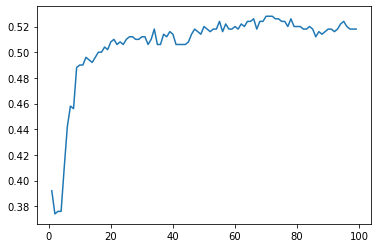

In [89]:
import matplotlib.pyplot as plt
from sklearn import metrics
accuracy = []
for k in range(1, 100):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
k_range = range(1,100)
plt.plot(k_range, accuracy)
plt.show()

In [96]:
clf=KNeighborsClassifier(n_neighbors=297,p=2,weights='distance',algorithm='brute')
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=297, weights='distance')

In [97]:
clf.score(X_train,y_train)

0.9994666666666666

In [98]:
clf.score(X_test,y_test)

0.5